In [21]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from prettytable import PrettyTable

%matplotlib inline

In [23]:
TEXT_COLOUR = {
    'PURPLE':'\033[95m',
    'CYAN':'\033[96m',
    'DARKCYAN':'\033[36m',
    'BLUE':'\033[94m',
    'GREEN':'\033[92m',
    'YELLOW':'\033[93m',
    'RED':'\033[91m',
    'BOLD':'\033[1m',
    'UNDERLINE':'\033[4m',
    'END':'\033[0m'
}

def print_bold(*msgs):
    print(TEXT_COLOUR['BOLD'])
    print(*msgs)
    print(TEXT_COLOUR['END'])

def print_green(*msgs):
    print(TEXT_COLOUR['GREEN'])
    print(*msgs)
    print(TEXT_COLOUR['END'])

def print_error(*msgs):
    print(TEXT_COLOUR['RED'])
    print(*msgs)
    print(TEXT_COLOUR['END'])

def wrap_green(msg):
    return TEXT_COLOUR['GREEN'] + msg + TEXT_COLOUR['END']

def wrap_red(msg):
    return TEXT_COLOUR['RED'] + msg + TEXT_COLOUR['END']

def up_down_str(val):
    msg = str(val)
    if val > 0:
        msg = wrap_green(msg)
    elif val < 0:
        msg = wrap_red(msg)
    return msg

In [24]:
dataset = 'SST-2'
num_layer = 12
num_heads = 12

In [25]:
color_dict = {
            0 :'r',
            1 :'g',
            2 :'b',
            3 :'y',
            4 :'cyan',
            5 :'magenta',
            6 :'black',
            7 :'grey',
            8 :'orange',
            9 :'purple',
            10 :'navy',
            11 :'pink'
        }

In [26]:
def display_plot(image1):
    # read images
    img_A = mpimg.imread(image1)

    # display images
    fig, ax = plt.subplots(1,1 ,figsize=(10,10))
    ax.imshow(img_A);
    ax.axis('off')
    plt.show()

In [27]:
def display_side_by_side(image1, image2):
    # read images
    img_A = mpimg.imread(image1)
    img_B = mpimg.imread(image2)

    # display images
    fig, ax = plt.subplots(1,2 ,figsize=(15,15))
    ax[0].imshow(img_A);
    ax[0].axis('off')
    ax[1].imshow(img_B);
    ax[1].axis('off')

In [28]:
def plot_head_relation(exclude_diff, keep_diff):
    fig, ax = plt.subplots(1,1 ,figsize=(5,5))

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.2,
                     box.width, box.height * 0.85])
    
    for ind, (exclude, keep) in enumerate(zip(exclude_diff, keep_diff)):
        scatter = ax.scatter(exclude, keep, c=color_dict[ind], label=ind, s=30)
    
#     lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), title="Heads", ncol=int(len(exclude_diff)/2), prop={'size': 10})
#     for handle in lgd.legendHandles:
#         handle.set_sizes([100.0])

    exclude_min_val = np.min(exclude_diff)
    exclude_max_val = np.max(exclude_diff)    
    exclude_margin = (exclude_max_val - exclude_min_val) / 5
    
    exclude_min_val = exclude_min_val - exclude_margin
    exclude_max_val = exclude_max_val + exclude_margin

    ax.set_xlim((exclude_min_val, exclude_max_val))
    ax.set_xlabel("excluding one")
    
    keep_min_val = np.min(keep_diff)
    keep_max_val = np.max(keep_diff)
    keep_margin = (keep_max_val - keep_min_val) / 5
    
    keep_min_val = keep_min_val - keep_margin
    keep_max_val = keep_max_val + keep_margin

    ax.set_ylim((keep_min_val, keep_max_val))
    ax.set_ylabel("keeping one")

    ax.axvline(x=0, ls="--", c=".3")
    ax.axhline(y=0, ls="--", c=".3")
    
    plt.xticks(rotation=90)
    
    plt.show()

In [29]:
def plot_all_relation(exclude_diff, keep_diff):
    fig, ax = plt.subplots(1,1 ,figsize=(7,7))

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.2,
                     box.width, box.height * 0.85])
    
    for ind, (exclude, keep) in enumerate(zip(exclude_diff, keep_diff)):
        scatter = ax.scatter(exclude, keep, label=ind, c=color_dict[ind], s=30)
    
    lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), title="Layers", ncol=int(len(exclude_diff)/2), prop={'size': 10})
    for handle in lgd.legendHandles:
        handle.set_sizes([100.0])

    exclude_min_val = np.min(exclude_diff)
    exclude_max_val = np.max(exclude_diff)    
    exclude_margin = (exclude_max_val - exclude_min_val) / 5
    
    exclude_min_val = exclude_min_val - exclude_margin
    exclude_max_val = exclude_max_val + exclude_margin

    ax.set_xlim((exclude_min_val, exclude_max_val))
    ax.set_xlabel("excluding one")
    
    keep_min_val = np.min(keep_diff)
    keep_max_val = np.max(keep_diff)
    keep_margin = (keep_max_val - keep_min_val) / 5
    
    keep_min_val = keep_min_val - keep_margin
    keep_max_val = keep_max_val + keep_margin

    ax.set_ylim((keep_min_val, keep_max_val))
    ax.set_ylabel("keeping one")

    ax.axvline(x=0, ls="--", c=".3")
    ax.axhline(y=0, ls="--", c=".3")
    
    plt.xticks(rotation=90)
    
    plt.show()

### following plots are generated with test set
### fine-tuned models are finetuned using train set
### seed is fixed

# < Heads ablation experiments >

## 1. removing single head vs keeping only single head for each layer

In [30]:
f=open(f"../ablation_results/1/{dataset}/ablation_results.txt", "r")
c1_acc = f.read().splitlines()

f=open(f"../ablation_results/1/{dataset}/reverse_ablation_results.txt", "r")
c11_acc = f.read().splitlines()

f=open(f"../ablation_results/2/{dataset}/ablation_results.txt", "r")
c2_acc = f.read().splitlines()

f=open(f"../ablation_results/2/{dataset}/reverse_ablation_results.txt", "r")
c10_acc = f.read().splitlines()

f=open(f"../ablation_results/mask_all/{dataset}/ablation_results.txt", "r")
masked_acc = f.read().splitlines()

base_acc = round(float(c1_acc[0]),5)
print(f"BASE MCC : {base_acc}")

c1_acc = c1_acc[1:]
c2_acc = c2_acc[1:]
c10_acc = c10_acc[1:]
c11_acc = c11_acc[1:]
masked_acc = masked_acc[1:]

print(len(c1_acc))
print(len(c11_acc))

print(len(c2_acc))
print(len(c10_acc))

print(len(masked_acc))

BASE MCC : 0.9094
144
144
1584
1584
12




< LAYER 0 >


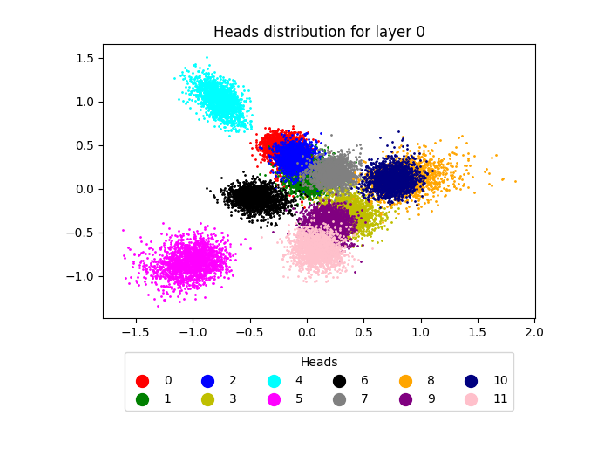

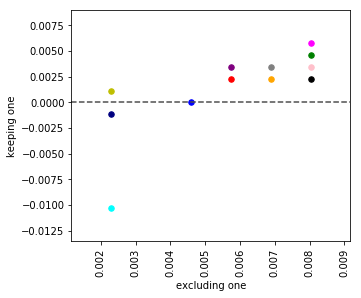

	head	ablating	keeping
	0	0.00574 	0.00230
	1	0.00803 	0.00459
	2	0.00459 	0.00000
	3	0.00230 	0.00115
	4	0.00230 	-0.01032
	5	0.00803 	0.00574
	6	0.00803 	0.00230
	7	0.00688 	0.00344
	8	0.00688 	0.00230
	9	0.00574 	0.00344
	10	0.00230 	-0.00114
	11	0.00803 	0.00344
	avg	0.00574 	0.00144


< LAYER 1 >


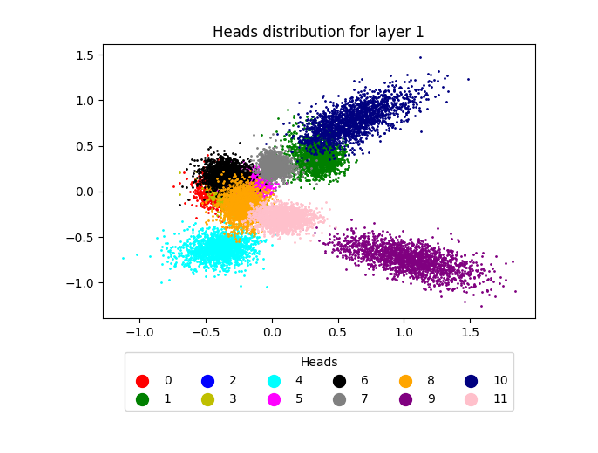

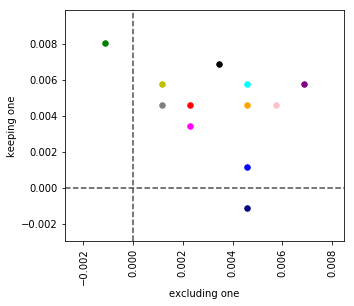

	head	ablating	keeping
	0	0.00230 	0.00459
	1	-0.00114 	0.00803
	2	0.00459 	0.00115
	3	0.00115 	0.00574
	4	0.00459 	0.00574
	5	0.00230 	0.00344
	6	0.00344 	0.00688
	7	0.00115 	0.00459
	8	0.00459 	0.00459
	9	0.00688 	0.00574
	10	0.00459 	-0.00114
	11	0.00574 	0.00459
	avg	0.00335 	0.00449


< LAYER 2 >


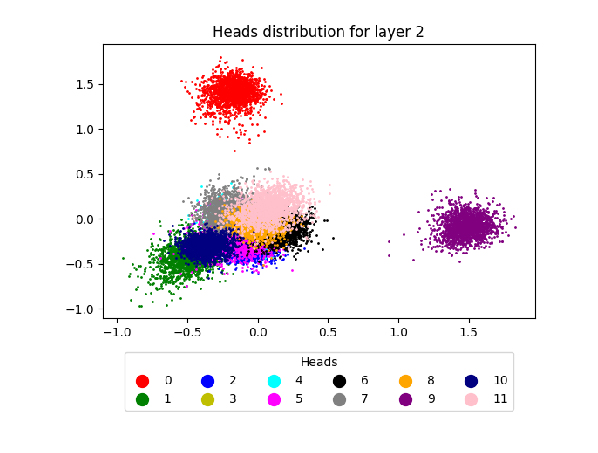

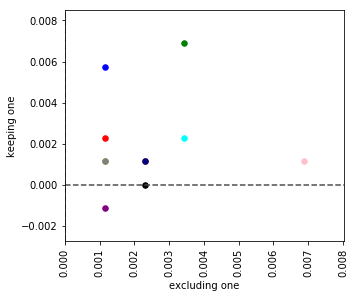

	head	ablating	keeping
	0	0.00115 	0.00230
	1	0.00344 	0.00688
	2	0.00115 	0.00574
	3	0.00115 	0.00115
	4	0.00344 	0.00230
	5	0.00230 	0.00115
	6	0.00230 	0.00000
	7	0.00115 	0.00115
	8	0.00230 	0.00115
	9	0.00115 	-0.00114
	10	0.00230 	0.00115
	11	0.00688 	0.00115
	avg	0.00239 	0.00192


< LAYER 3 >


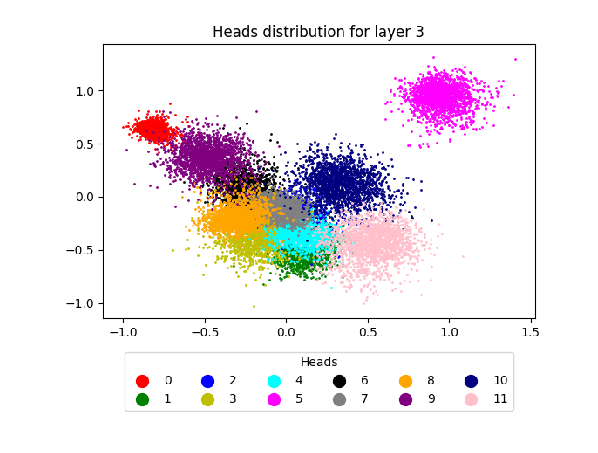

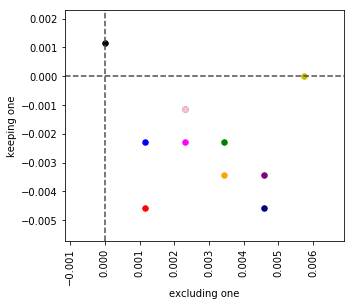

	head	ablating	keeping
	0	0.00115 	-0.00458
	1	0.00344 	-0.00229
	2	0.00115 	-0.00229
	3	0.00574 	0.00000
	4	0.00230 	-0.00114
	5	0.00230 	-0.00229
	6	0.00000 	0.00115
	7	0.00230 	-0.00114
	8	0.00344 	-0.00344
	9	0.00459 	-0.00344
	10	0.00459 	-0.00458
	11	0.00230 	-0.00114
	avg	0.00277 	-0.00210


< LAYER 4 >


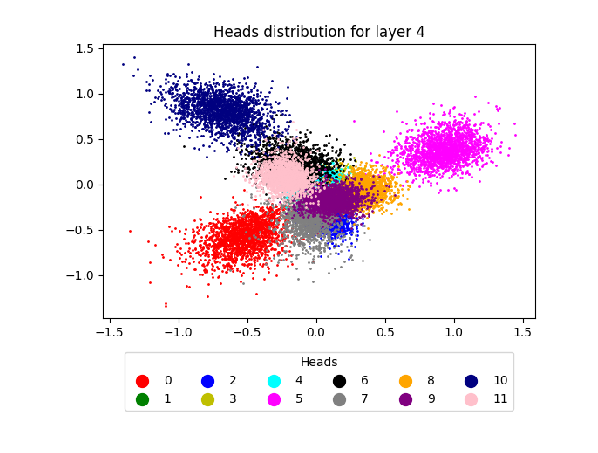

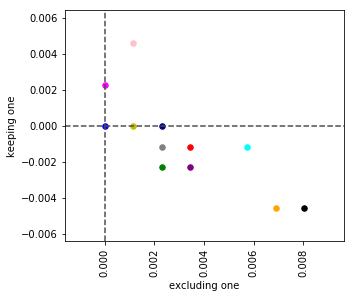

	head	ablating	keeping
	0	0.00344 	-0.00114
	1	0.00230 	-0.00229
	2	0.00000 	0.00000
	3	0.00115 	0.00000
	4	0.00574 	-0.00114
	5	0.00000 	0.00230
	6	0.00803 	-0.00458
	7	0.00230 	-0.00114
	8	0.00688 	-0.00458
	9	0.00344 	-0.00229
	10	0.00230 	0.00000
	11	0.00115 	0.00459
	avg	0.00306 	-0.00086


< LAYER 5 >


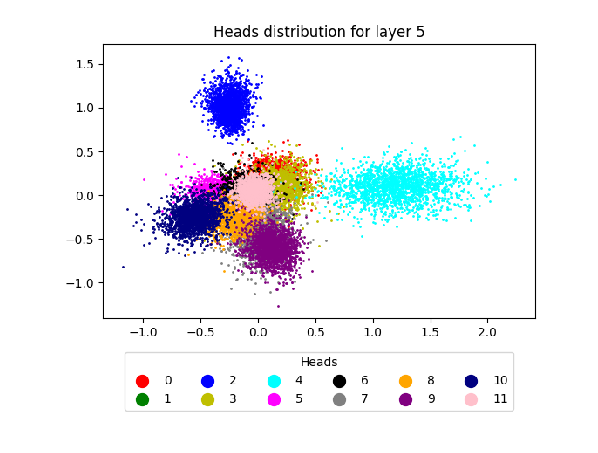

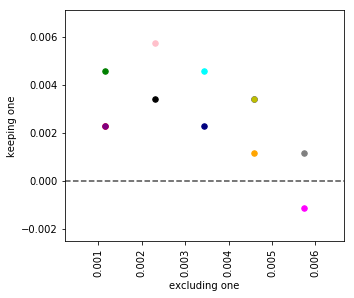

	head	ablating	keeping
	0	0.00115 	0.00230
	1	0.00115 	0.00459
	2	0.00459 	0.00344
	3	0.00459 	0.00344
	4	0.00344 	0.00459
	5	0.00574 	-0.00114
	6	0.00230 	0.00344
	7	0.00574 	0.00115
	8	0.00459 	0.00115
	9	0.00115 	0.00230
	10	0.00344 	0.00230
	11	0.00230 	0.00574
	avg	0.00335 	0.00278


< LAYER 6 >


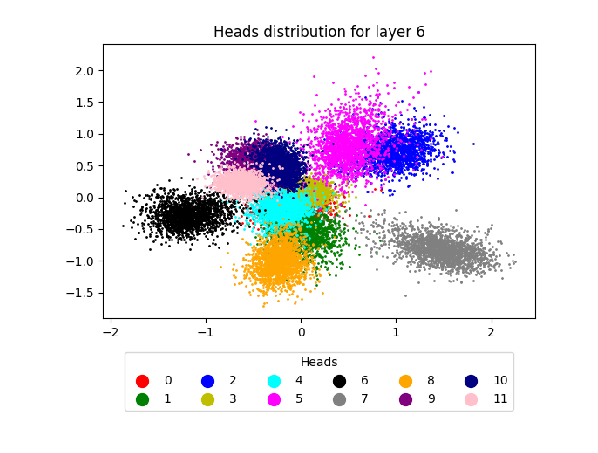

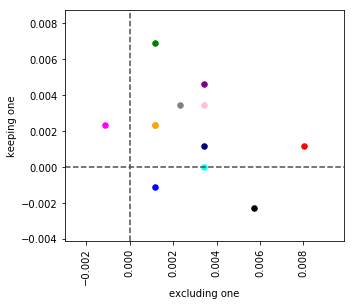

	head	ablating	keeping
	0	0.00803 	0.00115
	1	0.00115 	0.00688
	2	0.00115 	-0.00114
	3	0.00115 	0.00230
	4	0.00344 	0.00000
	5	-0.00114 	0.00230
	6	0.00574 	-0.00229
	7	0.00230 	0.00344
	8	0.00115 	0.00230
	9	0.00344 	0.00459
	10	0.00344 	0.00115
	11	0.00344 	0.00344
	avg	0.00277 	0.00201


< LAYER 7 >


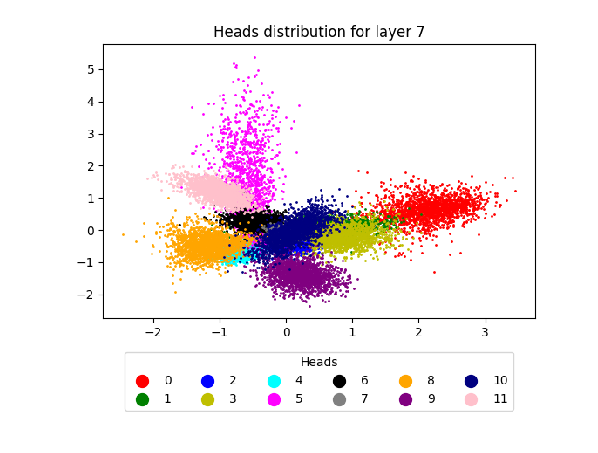

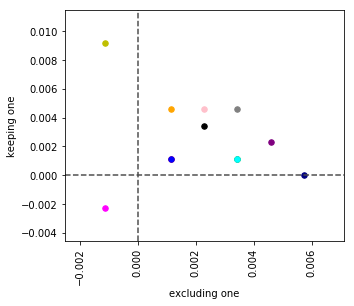

	head	ablating	keeping
	0	0.00115 	0.00115
	1	0.00344 	0.00115
	2	0.00115 	0.00115
	3	-0.00114 	0.00918
	4	0.00344 	0.00115
	5	-0.00114 	-0.00229
	6	0.00230 	0.00344
	7	0.00344 	0.00459
	8	0.00115 	0.00459
	9	0.00459 	0.00230
	10	0.00574 	0.00000
	11	0.00230 	0.00459
	avg	0.00220 	0.00258


< LAYER 8 >


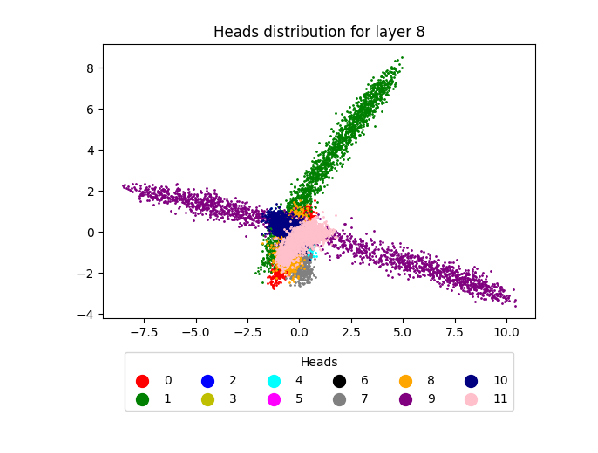

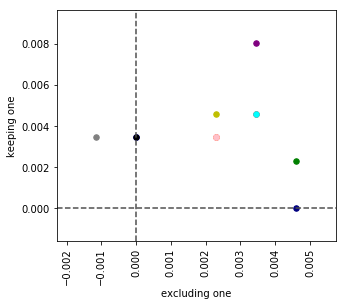

	head	ablating	keeping
	0	0.00344 	0.00459
	1	0.00459 	0.00230
	2	0.00000 	0.00344
	3	0.00230 	0.00459
	4	0.00344 	0.00459
	5	0.00230 	0.00344
	6	0.00000 	0.00344
	7	-0.00114 	0.00344
	8	0.00230 	0.00344
	9	0.00344 	0.00803
	10	0.00459 	0.00000
	11	0.00230 	0.00344
	avg	0.00230 	0.00373


< LAYER 9 >


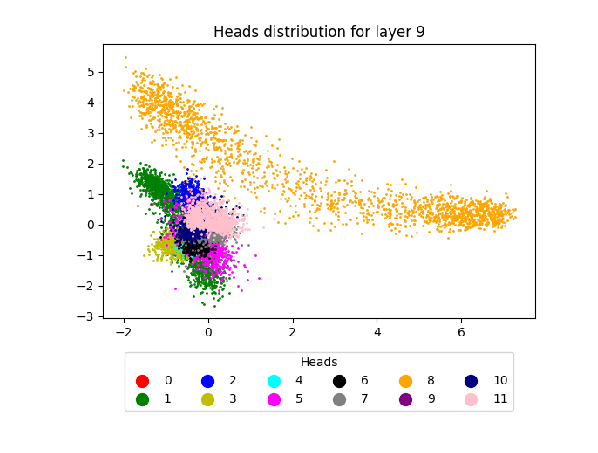

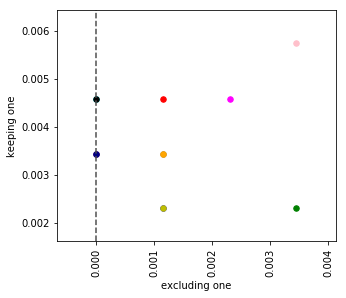

	head	ablating	keeping
	0	0.00115 	0.00459
	1	0.00344 	0.00230
	2	0.00115 	0.00230
	3	0.00115 	0.00230
	4	0.00000 	0.00459
	5	0.00230 	0.00459
	6	0.00000 	0.00459
	7	0.00115 	0.00344
	8	0.00115 	0.00344
	9	0.00000 	0.00344
	10	0.00000 	0.00344
	11	0.00344 	0.00574
	avg	0.00124 	0.00373


< LAYER 10 >


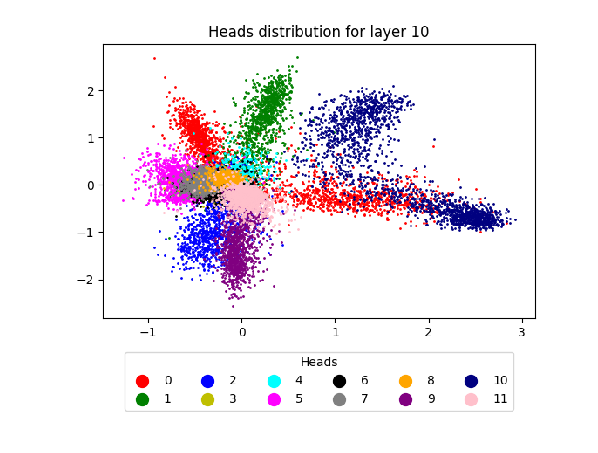

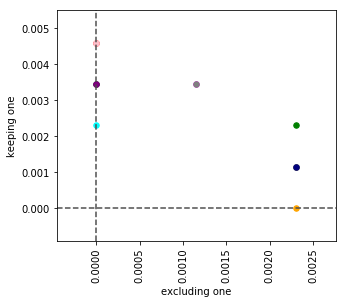

	head	ablating	keeping
	0	0.00000 	0.00459
	1	0.00230 	0.00230
	2	0.00230 	0.00115
	3	0.00230 	0.00115
	4	0.00000 	0.00230
	5	0.00115 	0.00344
	6	0.00000 	0.00344
	7	0.00115 	0.00344
	8	0.00230 	0.00000
	9	0.00000 	0.00344
	10	0.00230 	0.00115
	11	0.00000 	0.00459
	avg	0.00115 	0.00258


< LAYER 11 >


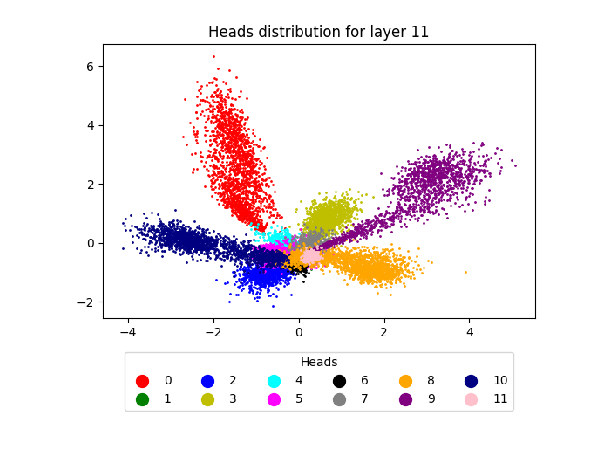

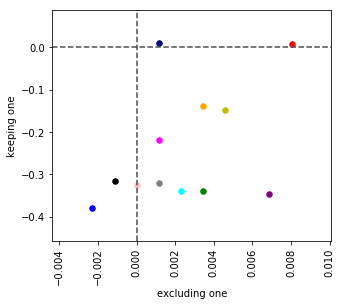

	head	ablating	keeping
	0	0.00803 	0.00918
	1	0.00344 	-0.33830
	2	-0.00229 	-0.37958
	3	0.00459 	-0.14908
	4	0.00230 	-0.33830
	5	0.00115 	-0.21903
	6	-0.00114 	-0.31651
	7	0.00115 	-0.32110
	8	0.00344 	-0.13761
	9	0.00688 	-0.34633
	10	0.00115 	0.01032
	11	0.00000 	-0.32568
	avg	0.00239 	-0.23767


In [31]:
all_exclude_relations = []
all_keep_relations = []

for layer_ind in range(num_layer):
    print(f"\n\n< LAYER {layer_ind} >")
    display_plot(f"../head_distributions/{dataset}/attn-l{layer_ind}-heads.png")
    
    excluding_diffs = []
    keep_diffs = []

    for head_ind in range(num_heads):
        log_ind_base = (num_heads*layer_ind) + head_ind
        ablated_acc = float(c1_acc[log_ind_base])
        ablate_one_diff = round(ablated_acc - base_acc, 5)
        
        reverse_acc = float(c11_acc[log_ind_base])
        reverse_diff = round(reverse_acc - base_acc, 5)
        
        excluding_diffs.append(ablate_one_diff)
        keep_diffs.append(reverse_diff)
        
    plot_head_relation(excluding_diffs, keep_diffs)
    
    all_exclude_relations.append(excluding_diffs)
    all_keep_relations.append(keep_diffs)
    
    print("\thead\tablating\tkeeping")
    for ind, (ablate_one_diff, reverse_diff) in enumerate(zip(excluding_diffs, keep_diffs)):
        print('\t{0}\t{1:.5f} \t{2:.5f}'.format(ind, ablate_one_diff, reverse_diff))
        
    print('\t{0}\t{1:.5f} \t{2:.5f}'.format("avg", np.mean(excluding_diffs), np.mean(keep_diffs)))


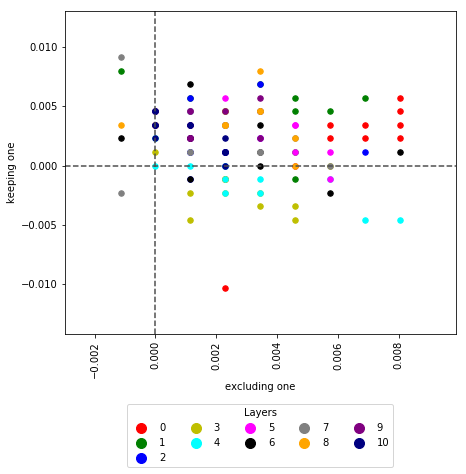

In [32]:
plot_all_relation(all_exclude_relations[:-1], all_keep_relations[:-1])

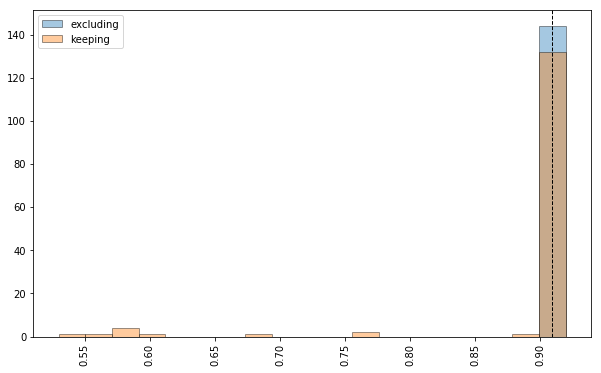

In [33]:
fig = plt.gcf()
fig.set_size_inches(10, 6)

num_bins = 20

reported_acc = np.array(c1_acc, dtype=float)
reported_acc = np.around(reported_acc, 5)

reported_reverse_acc = np.array(c11_acc[1:], dtype=float)
reported_reverse_acc = np.around(reported_reverse_acc, 5)

bins = np.linspace(min(reported_acc.min(), reported_reverse_acc.min()), max(reported_acc.max(), reported_reverse_acc.max()), num_bins)

plt.hist(reported_acc, bins, edgecolor='k', alpha=0.4, label='excluding')
plt.hist(reported_reverse_acc, bins, edgecolor='k', alpha=0.4, label='keeping')
plt.axvline(base_acc, color='k', linestyle='dashed', linewidth=1)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()


## 2. removing two heads

In [34]:
c2_acc_map = {}

for entry in c2_acc:
    mask, acc = entry.split()
    layer, heads = mask.split(':')
    
    layer = int(layer)-1
    
    if layer not in c2_acc_map:
        c2_acc_map[layer] = {}
        
    head_one, head_two = heads.split(',')
    new_head_key = str(int(head_one) -1) + "," + str(int(head_two) -1)
        
    c2_acc_map[layer][new_head_key] = round(float(acc) - base_acc, 5)

In [35]:
c2_tables = []

head_labels = list(range(1, num_heads))
head_labels.insert(0, " ")
head_labels = list(map(str, head_labels))

counter = 0

for layer_ind in range(num_layer):
#     print(f'< layer {layer_ind} >')
    c2_tables.append(PrettyTable(head_labels))
    for head_ind_1 in range(num_heads-1):
        accs = [str(head_ind_1)]
        for head_ind_2 in range(1, num_heads):
            if head_ind_2 <= head_ind_1:
                accs.append('-')
            else:
                key = str(head_ind_1) + ',' + str(head_ind_2)
                
                val = c2_acc_map[layer_ind][key]
                
                msg = str(round(val, 4))
                
                if val > 0:
                    msg = wrap_green(msg)
                elif val < 0:
                    msg = wrap_red(msg)
                
                accs.append(msg)
#                 accs.append(str(round(c2_acc_map[layer_ind][key] * 100, 2)))
            
                counter += 1
        c2_tables[-1].add_row(accs)
#     print(tables[-1])


## 2. removing two heads

In [36]:
c10_acc_map = {}

for entry in c10_acc:
    mask, acc = entry.split()
    layer, heads = mask.split(':')
    
    layer = int(layer)-1
    
    if layer not in c10_acc_map:
        c10_acc_map[layer] = {}
        
    head_one, head_two = heads.split(',')
    new_head_key = str(int(head_one) -1) + "," + str(int(head_two) -1)
        
    c10_acc_map[layer][new_head_key] = round(float(acc) - base_acc, 5)
#     c10_acc_map[layer][new_head_key] = round(float(acc), 5)

In [37]:
c10_tables = []

head_labels = list(range(1, num_heads))
head_labels.insert(0, " ")
head_labels = list(map(str, head_labels))

counter = 0

for layer_ind in range(num_layer):
#     print(f'< layer {layer_ind} >')
    c10_tables.append(PrettyTable(head_labels))
    for head_ind_1 in range(num_heads-1):
        accs = [str(head_ind_1)]
        for head_ind_2 in range(1, num_heads):
            if head_ind_2 <= head_ind_1:
                accs.append('-')
            else:
                key = str(head_ind_1) + ',' + str(head_ind_2)
                
                val = c10_acc_map[layer_ind][key]
                
                msg = str(round(val, 4))
                
                if val > 0:
                    msg = wrap_green(msg)
                elif val < 0:
                    msg = wrap_red(msg)
                
                accs.append(msg)
                
                counter += 1
        c10_tables[-1].add_row(accs)
#     print(c10_tables[-1])


In [38]:
for head_ind in range(num_heads):
    log_ind_base = (num_heads*layer_ind) + head_ind
    ablated_acc = float(c1_acc[log_ind_base])
    ablate_one_diff = round(ablated_acc - base_acc, 5)

    reverse_acc = float(c11_acc[log_ind_base])
    reverse_diff = round(reverse_acc - base_acc, 5)

    excluding_diffs.append(ablate_one_diff)
    keep_diffs.append(reverse_diff)


for layer_ind in range(num_layer):
    print(f'\n -------- < layer {layer_ind} > -------- base : ', base_acc)
    
    print_bold("11 heads (drop 1)")
    for head_ind in range(num_heads):
        log_ind_base = (num_heads*layer_ind) + head_ind
        ablated_acc = float(c1_acc[log_ind_base])
        ablate_one_diff = round(ablated_acc - base_acc, 5)
        print(head_ind, '\t', up_down_str(ablate_one_diff))
    
    print_bold("\n10 heads (drop 2)")
    print(c2_tables[layer_ind])
    print_bold("\n2 heads (drop 10)")
    print(c10_tables[layer_ind])
    print_bold("\n1 heads (drop 11)")
    for head_ind in range(num_heads):
        log_ind_base = (num_heads*layer_ind) + head_ind
        reverse_acc = float(c11_acc[log_ind_base])
        reverse_diff = round(reverse_acc - base_acc, 5)
        print(head_ind, '\t', up_down_str(reverse_diff))
    
    masked_all_acc = float(masked_acc[layer_ind].split()[2])
    masked_diff = round(masked_all_acc - base_acc, 5)
    
    print_bold("\ndrop all heads", up_down_str(masked_diff))


 -------- < layer 0 > -------- base :  0.9094

11 heads (drop 1)

0 	 0.00574
1 	 0.00803
2 	 0.00459
3 	 0.0023
4 	 0.0023
5 	 0.00803
6 	 0.00803
7 	 0.00688
8 	 0.00688
9 	 0.00574
10 	 0.0023
11 	 0.00803


10 heads (drop 2)

+----+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|    |   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8    |   9    |   10   |   11   |
+----+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| 0  | 0.0092 | 0.0057 | 0.0057 |  0.0   | 0.0092 | 0.008  | 0.0092 | 0.0103 | 0.0092 | 0.0034 | 0.0115 |
| 1  |   -    | 0.0057 | 0.008  | 0.008  | 0.0161 | 0.0092 | 0.0103 | 0.0149 | 0.0092 | 0.008  | 0.0092 |
| 2  |   -    |   -    | 0.0023 | 0.0046 | 0.0092 | 0.0069 | 0.0057 | 0.008  | 0.0034 | 0.0034 | 0.008  |
| 3  |   -    |   -    |   -    | 0.0023 | 0.0103 | 0.0057 | 0.0057 | 0.0092 | 0.0034 | 0.0023 | 0.0069 |
| 4  |   -    |   -    |   